<a href="https://colab.research.google.com/github/wzh1998/CVPR-Learning/blob/main/Homography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip uninstall opencv-python
!pip install opencv-contrib-python

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
y
  Successfully uninstalled opencv-python-4.1.2.30


In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [12]:
MIN_MATCH_COUNT = 10

img1 = cv2.imread('1.JPG',0)          # queryImage
img2 = cv2.imread('2.JPG',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.4*n.distance:
        good.append(m)

In [13]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

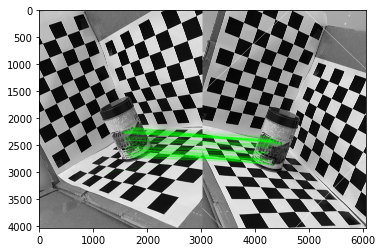

[[ 6.74387867e-01 -6.94748637e-01  1.75141474e+03]
 [ 6.53519184e-01  6.30300919e-01 -1.32933673e+02]
 [-2.16707084e-06 -1.54832911e-05  1.00000000e+00]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
cv2.imwrite("Homography.jpg", img3)
plt.imshow(img3, 'gray'),plt.show()
from google.colab import files
print(M)
files.download('Homography.jpg') 